In [1]:
#Importing the Libraries
import pandas as pd

from datetime import datetime

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
%matplotlib inline


In [2]:
#Get the Dataset
data_train=pd.read_csv("NewData/WFC2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
data_train.sort_values(by="Date", ascending = False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-18,43.290001,43.310001,41.889999,42.110001,42.110001,27351300
2022-05-17,42.990002,43.820000,42.959999,43.709999,43.709999,23340500
2022-05-16,42.400002,42.669998,41.700001,42.209999,42.209999,16837400
2022-05-13,42.450001,43.189999,42.279999,42.639999,42.639999,21251600
2022-05-12,42.230000,42.410000,40.919998,41.810001,41.810001,30171700
...,...,...,...,...,...,...
2016-01-25,48.910000,48.980000,47.619999,47.660000,39.387703,23440800
2016-01-22,49.029999,49.270000,48.560001,49.020000,40.511646,18298700
2016-01-21,48.029999,49.049999,47.910000,48.009998,39.676952,24272900


In [3]:
data_train.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", data_train. shape)
print("Null Value Present: ", data_train.isnull().values.any())

Dataframe Shape:  (1596, 6)
Null Value Present:  False


In [5]:
# Use close price to Train the model

training_set = data_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[49.540001]
 [48.25    ]
 [49.049999]
 ...
 [42.669998]
 [43.82    ]
 [43.310001]]
(1596, 1)


In [6]:
# Normalize the dataset (0,1): scale the dataset to be from 0 to 1: 

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.62675278],
       [0.59804143],
       [0.61584689],
       ...,
       [0.4738482 ],
       [0.49944361],
       [0.48809264]])

In [7]:
# Create X_train and y_train data structure

X_train = []
y_train = []
for i in range(60,1354):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)


In [8]:
print(X_train)

[[0.62675278 0.59804143 0.61584689 ... 0.58602272 0.5886936  0.62029828]
 [0.59804143 0.61584689 0.62074341 ... 0.5886936  0.62029828 0.6214111 ]
 [0.61584689 0.62074341 0.61428893 ... 0.62029828 0.6214111  0.61339863]
 ...
 [0.37257958 0.38949482 0.38771423 ... 0.5613176  0.578678   0.56754958]
 [0.38949482 0.38771423 0.40774544 ... 0.578678   0.56754958 0.57934568]
 [0.38771423 0.40774544 0.40529716 ... 0.56754958 0.57934568 0.5804585 ]]


In [9]:
print(X_train.shape)
print(y_train.shape)

(1294, 60)
(1294,)


In [10]:
# Reshape the data

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1294, 60, 1)

In [11]:
# by Importing the Crucial Libraries 

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [12]:
# Building the Model by Adding Different Layers to LSTM

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [13]:
# Fit the Model

regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
41/41 [==============================] - 5s 37ms/step - loss: 0.0473
Epoch 2/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0085
Epoch 3/30
41/41 [==============================] - 2s 37ms/step - loss: 0.0070
Epoch 4/30
41/41 [==============================] - 1s 37ms/step - loss: 0.0072
Epoch 5/30
41/41 [==============================] - 2s 37ms/step - loss: 0.0067
Epoch 6/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0067
Epoch 7/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0065
Epoch 8/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0059
Epoch 9/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0056
Epoch 10/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0060
Epoch 11/30
41/41 [==============================] - 1s 37ms/step - loss: 0.0058
Epoch 12/30
41/41 [==============================] - 2s 37ms/step - loss: 0.0048
Epoch 13/30
41/41 [==================

In [14]:
# Use the current close price as sample dataset for prediction

data_test = data_train
data_test


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-19,49.250000,49.540001,47.990002,48.209999,39.842239,29918500
2016-01-20,47.279999,48.250000,46.880001,47.869999,39.561249,40241100
2016-01-21,48.029999,49.049999,47.910000,48.009998,39.676952,24272900
2016-01-22,49.029999,49.270000,48.560001,49.020000,40.511646,18298700
2016-01-25,48.910000,48.980000,47.619999,47.660000,39.387703,23440800
...,...,...,...,...,...,...
2022-05-12,42.230000,42.410000,40.919998,41.810001,41.810001,30171700
2022-05-13,42.450001,43.189999,42.279999,42.639999,42.639999,21251600
2022-05-16,42.400002,42.669998,41.700001,42.209999,42.209999,16837400


In [15]:
# prepare the inputs for the prediction model

dataset_total = pd.concat((data_train['Open'], data_train['Close']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(data_train)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [16]:
X_test = []
for x in range(60,80):
    X_test.append(inputs[x-60:x,0])
X_test = np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [17]:
predicted_prices = regressor.predict(X_test)
predicted_prices

array([[0.47916725],
       [0.47839376],
       [0.4828531 ],
       [0.4932492 ],
       [0.5092482 ],
       [0.528668  ],
       [0.5490422 ],
       [0.5682428 ],
       [0.58481574],
       [0.5985524 ],
       [0.60943615],
       [0.61699665],
       [0.6203619 ],
       [0.6195662 ],
       [0.6150751 ],
       [0.60712373],
       [0.59633756],
       [0.58360916],
       [0.5695989 ],
       [0.55617654]], dtype=float32)

In [18]:
# List prices in the next 20 days: 
predicted_prices= scaler.inverse_transform(predicted_prices)
predicted_prices

array([[42.908985],
       [42.87423 ],
       [43.07459 ],
       [43.541687],
       [44.26052 ],
       [45.133053],
       [46.048466],
       [46.911148],
       [47.65577 ],
       [48.27296 ],
       [48.761963],
       [49.101658],
       [49.252857],
       [49.217106],
       [49.015324],
       [48.658066],
       [48.173443],
       [47.60156 ],
       [46.972076],
       [46.36901 ]], dtype=float32)

In [19]:
len(predicted_prices)


20

In [20]:
# df in future 20days

pred_df=pd.DataFrame({'Date': ['2022-05-19','2022-05-20','2022-05-21','2022-05-22',
                        '2022-05-23','2022-05-24','2022-05-25','2022-05-26',
                        '2022-05-27','2022-05-28','2022-05-29','2022-05-30',
                        '2022-05-31','2022-06-01','2022-06-02','2022-06-03',
                        '2022-06-04','2022-06-05','2022-06-06','2022-06-07'
                        ]
                     }
)
pred_df['pred_close']=predicted_prices
pred_df.set_index('Date', inplace=True)
pred_df.head(21)

,pred_close
Date,
2022-05-19,42.908985
2022-05-20,42.874229
2022-05-21,43.074589
2022-05-22,43.541687
2022-05-23,44.260521
2022-05-24,45.133053
2022-05-25,46.048466
2022-05-26,46.911148
2022-05-27,47.655769


In [25]:
data_train.iloc[1576:1596,1]

Date
2022-04-21    49.490002
2022-04-22    47.919998
2022-04-25    45.970001
2022-04-26    46.000000
2022-04-27    45.189999
2022-04-28    45.310001
2022-04-29    45.400002
2022-05-02    44.040001
2022-05-03    44.639999
2022-05-04    46.130001
2022-05-05    45.060001
2022-05-06    44.880001
2022-05-09    44.540001
2022-05-10    44.709999
2022-05-11    44.509998
2022-05-12    42.410000
2022-05-13    43.189999
2022-05-16    42.669998
2022-05-17    43.820000
2022-05-18    43.310001
Name: High, dtype: float64

In [22]:
len(data_train.iloc[:,1])

1596

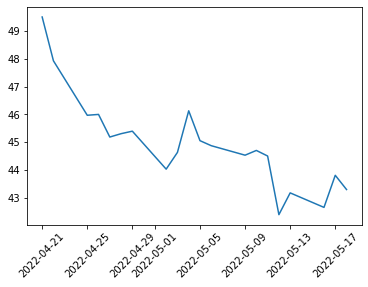

<Figure size 2880x1440 with 0 Axes>

In [26]:
plt.plot(data_train.iloc[1576:1596,1])
plt.xticks(rotation=45)
plt.figure(figsize = (40,20))
plt.tight_layout()

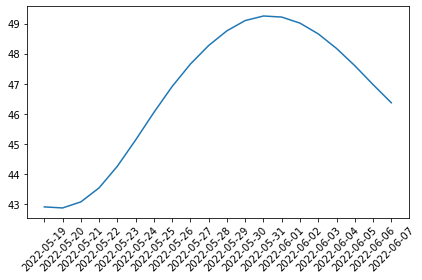

In [27]:
plt.plot(pred_df['pred_close'])
plt.xticks(rotation = 45)
plt.tight_layout()

In [28]:
pred_df.head()

,pred_close
Date,
2022-05-19,42.908985
2022-05-20,42.874229
2022-05-21,43.074589
2022-05-22,43.541687
2022-05-23,44.260521
